## II. OPTICS

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize, StandardScaler

In [15]:
X = pd.read_csv('cereal_activity.csv')
X.head()

ID                       name  calories  carbo  sugars
0   0                  100% Bran        70    5.0       6
1   1          100% Natural Bran       120    8.0       8
2   2                   All-Bran        70    7.0       5
3   3  All-Bran with Extra Fiber        50    8.0       0
4   4             Almond Delight       110   14.0       8

In [16]:
drop_features = ['ID','name']
X = X.drop(drop_features, axis = 1)

In [17]:
X.ffill(inplace=True)
X.head()

calories  carbo  sugars
0        70    5.0       6
1       120    8.0       8
2        70    7.0       5
3        50    8.0       0
4       110   14.0       8

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
dbscan_clusterer = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_clusterer.fit_predict(X_scaled)

In [24]:
optics_clusterer = OPTICS(min_samples=5)
optics_labels = optics_clusterer.fit_predict(X_scaled)

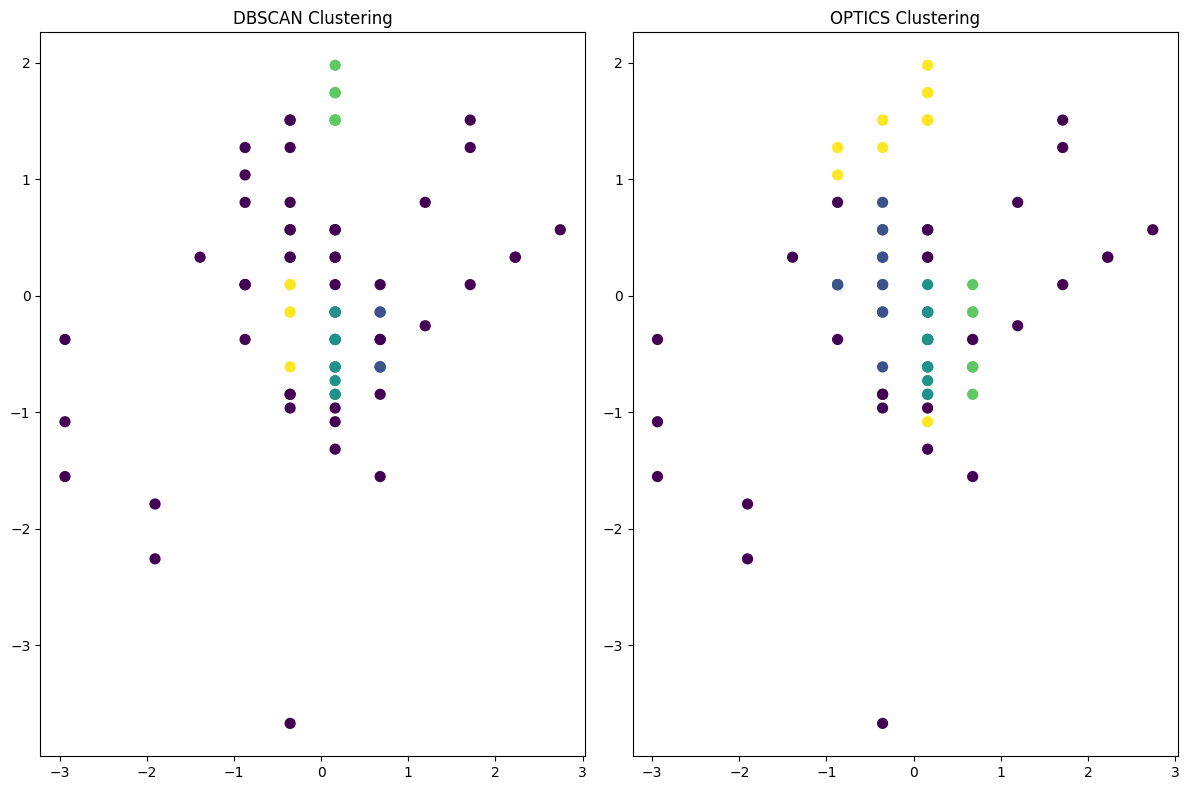

In [28]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
ax0.set_title('DBSCAN Clustering')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=optics_labels, cmap='viridis', s=50)
ax1.set_title('OPTICS Clustering')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'OPTICS Clustering')

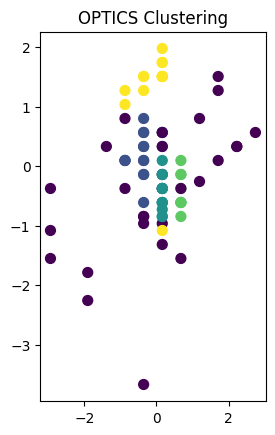

<Figure size 640x480 with 0 Axes>